In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
mydata=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/auto-mpg.csv")

In [69]:
mydata.shape

(398, 9)

In [70]:
mydata.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [71]:
mydata.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car name     object
dtype: object

In [72]:
mydata.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car name    0
dtype: int64

In [73]:
mydata.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [74]:
#mydata=mydata.drop('car name',axis=1)      Runned aleady (only once)

In [75]:
mydata.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [76]:
mydata['origin']=mydata['origin'].replace({'1':'America',2:'Asia',3:'Europe'})
mydata.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [77]:
#mydata=pd.get_dummies(mydata,columns=['origin'])      ###one hot encoding
#mydata.sample(5)

In [78]:
mydata.sample(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
71,19.0,3,70.0,97,2330,13.5,72,Europe,mazda rx2 coupe
59,23.0,4,97.0,54,2254,23.5,72,Asia,volkswagen type 3
341,23.5,6,173.0,110,2725,12.6,81,1,chevrolet citation
38,14.0,8,350.0,165,4209,12.0,71,1,chevrolet impala
158,16.0,8,318.0,150,4498,14.5,75,1,plymouth grand fury


In [79]:
mydata['hp']=mydata['hp'].replace(to_replace='?',value=np.nan)
mydata['hp']=mydata['hp'].astype(float)

In [80]:
median1=mydata['hp'].median()
median1=mydata['hp'].replace(np.nan,median1,inplace=True)

In [81]:
mydata.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin       object
car name     object
dtype: object

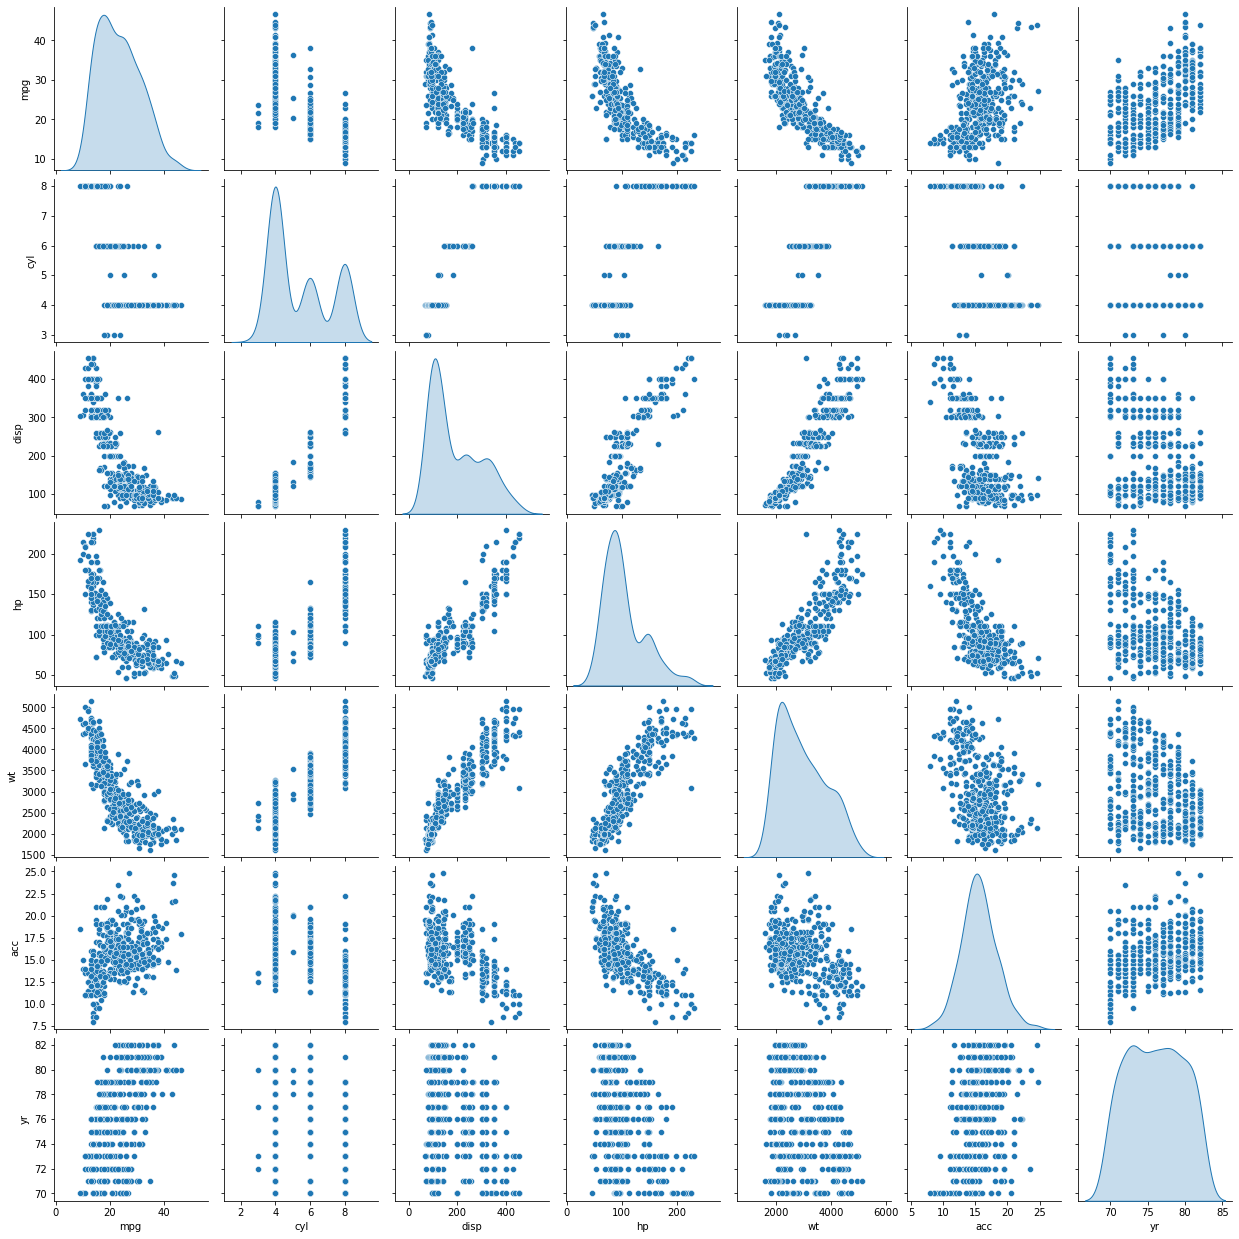

In [82]:
sns.pairplot(mydata,diag_kind="kde")

In [83]:
x=mydata.drop(['mpg'],axis=1)
y=mydata[['mpg']]

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [86]:
#reg_model=LinearRegression()
#reg_model.fit(x_train,y_train)

In [ ]:
reg_model.score(x_train,y_train)

In [ ]:
reg_model.score(x_test,y_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [ ]:
poly=PolynomialFeatures(degree=2,interaction_only=True)
x_train2=poly.fit_transform(x_train)
x_test2=poly.fit_transform(x_test)
poly_clf=linear_model.LinearRegression()
poly_clf.fit(x_train2,y_train)
print(poly_clf.score(x_train2,y_train))

In [ ]:
print(poly_clf.score(x_test2,y_test))

In [ ]:
poly=PolynomialFeatures(degree=1,interaction_only=True)
x_train2=poly.fit_transform(x_train)
x_test2=poly.fit_transform(x_test)
poly_clf=linear_model.LinearRegression()
poly_clf.fit(x_train2,y_train)
print(poly_clf.score(x_train2,y_train))

In [ ]:
print(poly_clf.score(x_test2,y_test))